In [65]:
import pandas as pd
from datasets import load_dataset
from matplotlib import pyplot as plt

# Loading Dataset
datasets = load_dataset("lukebarousse/data_jobs")
df = datasets['train'].to_pandas()

# Cleaning Datasets
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Creating Two Datasets:

In [66]:
job_data = {
    'job_id': [1, 2, 3, 4, 5],
    'job_title': ['Data Scientist', 'Software Engineer', 'Product Manager', 'Marketing Director', 'HR Manager'],
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'job_location': ['Mountain View, CA', 'Redmond, WA', 'Cupertino, CA', 'Beaverton, OR', 'Seattle, WA']
}

company_data = {
    'company_name': ['Google', 'Microsoft', 'Apple', 'Nike', 'Starbucks'],
    'industry': ['Technology', 'Technology', 'Technology', 'Apparel', 'Food & Beverage'],
    'company_size': ['100,000+', '100,000+', '100,000+', '75,000+', '346,000+']
}


df_jobs = pd.DataFrame(job_data)
df_companies = pd.DataFrame(company_data)

In [67]:
df_jobs

,job_id,job_title,company_name,job_location
0,1,Data Scientist,Google,"Mountain View, CA"
1,2,Software Engineer,Microsoft,"Redmond, WA"
2,3,Product Manager,Apple,"Cupertino, CA"
3,4,Marketing Director,Nike,"Beaverton, OR"
4,5,HR Manager,Starbucks,"Seattle, WA"


In [68]:
df_companies

,company_name,industry,company_size
0,Google,Technology,"100,000+"
1,Microsoft,Technology,"100,000+"
2,Apple,Technology,"100,000+"
3,Nike,Apparel,"75,000+"
4,Starbucks,Food & Beverage,"346,000+"


In [69]:
df_jobs.merge(df_companies, on='company_name')

,job_id,job_title,company_name,job_location,industry,company_size
0,1,Data Scientist,Google,"Mountain View, CA",Technology,"100,000+"
1,2,Software Engineer,Microsoft,"Redmond, WA",Technology,"100,000+"
2,3,Product Manager,Apple,"Cupertino, CA",Technology,"100,000+"
3,4,Marketing Director,Nike,"Beaverton, OR",Apparel,"75,000+"
4,5,HR Manager,Starbucks,"Seattle, WA",Food & Beverage,"346,000+"


## Merge pivot tables

### Dataset:

In [70]:
df_uk = df[df['job_country'] == 'United Kingdom'].copy()
df_uk['job_posted_month'] = df_uk['job_posted_date'].dt.strftime('%B')
count_pt = df_uk.pivot_table(index='job_posted_month', columns='job_title_short', aggfunc='size')
count_pt.reset_index(inplace=True)
count_pt['month_number'] = pd.to_datetime(count_pt['job_posted_month'], format='%B').dt.month
count_pt.sort_values('month_number', inplace=True)
count_pt.set_index('job_posted_month',inplace=True)
count_pt.drop(columns='month_number',inplace=True)
count_pt

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,46,3,1467,1253,1142,8,169,347,326,20
February,23,4,1051,1009,859,10,140,301,212,10
March,47,5,712,789,699,8,91,224,179,19
April,29,7,561,611,519,8,63,155,123,18
May,23,1,614,645,486,11,60,227,153,16
June,14,2,736,862,636,3,102,292,154,4
July,38,5,892,960,646,13,116,321,184,12
August,22,7,610,863,657,15,96,247,181,13
September,111,32,1112,1191,898,51,139,320,221,116


In [71]:
# add index col to set the index name to job months also to match with the index above
df_us_softwaredev = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')
df_us_softwaredev

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [72]:
df_merged = df_us_softwaredev.merge(count_pt, on='job_posted_month', how='inner')
df_merged

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,,,,,
January,13619,9827,5108,4348,46,3,1467,1253,1142,8,169,347,326,20
February,11456,9116,7298,4284,23,4,1051,1009,859,10,140,301,212,10
March,11102,8178,5814,4159,47,5,712,789,699,8,91,224,179,19
April,14037,9209,7232,4220,29,7,561,611,519,8,63,155,123,18
May,12126,8864,6718,4980,23,1,614,645,486,11,60,227,153,16
June,12003,8065,5902,4781,14,2,736,862,636,3,102,292,154,4
July,11914,8061,6839,4344,38,5,892,960,646,13,116,321,184,12
August,11571,8191,7413,4104,22,7,610,863,657,15,96,247,181,13
September,14016,8447,6139,4094,111,32,1112,1191,898,51,139,320,221,116


In [73]:
top5 = df_merged.sum().head(5).sort_values(ascending=False)
top5 = top5.index.to_list()

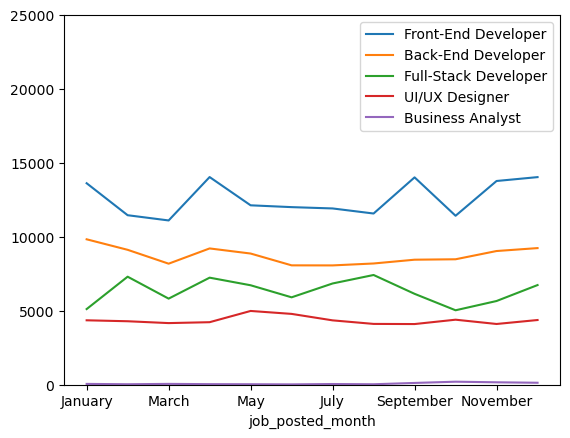

In [78]:
df_merged[top5].plot(kind='line')
plt.ylim(0, 25000)
plt.legend()
plt.show()

In [75]:
# this code if you dont have none match title but match value to merge with 


# import pandas as pd

# # Read dataset one and set index
# df1 = pd.read_csv("dataset_one.csv", index_col=0)  # First column is the index (Months)

# # Read dataset two and set index
# df2 = pd.read_csv("dataset_two.csv", index_col=0)  # First column is the index (Months)

# # Merge on index (since both datasets have months as index)
# merged_df = df1.merge(df2, left_index=True, right_index=True)